In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Adaline:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate  # Taxa de aprendizado
        self.epochs = epochs  # Número de épocas de treinamento

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])  # Inicialização dos pesos
        self.costs = []  # Lista para armazenar os custos em cada época

        for _ in range(self.epochs):
            output = self.predict(X)  # Previsões atuais
            errors = y - output  # Erros de previsão
            self.weights[1:] += self.learning_rate * X.T.dot(errors)  # Atualização dos pesos
            self.weights[0] += self.learning_rate * errors.sum()  # Atualização do peso do viés
            cost = (errors ** 2).sum() / 2.0  # Cálculo do custo (erro médio quadrático)
            self.costs.append(cost)  # Armazena o custo atual

        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]  # Cálculo da entrada ponderada

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # Função de ativação


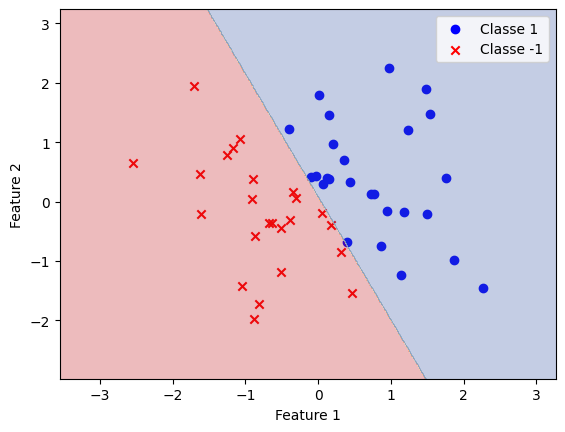

In [3]:
# Criando um conjunto de dados aleatório de exemplo
np.random.seed(0)
num_samples = 50
X = np.random.randn(num_samples, 2)  # Duas características (2D)
y = np.where(2 * X[:, 0] + X[:, 1] > 0, 1, -1)  # Criação de rótulos

# Criando e treinando um modelo Adaline
model = Adaline(learning_rate=0.01, epochs=100)
model.fit(X, y)

# Realizando previsões para todo o conjunto de dados
predictions = model.predict(X)

# Plot dos dados e da fronteira de decisão aprendida
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', label='Classe 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', marker='x', label='Classe -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.legend()
plt.show()